In [1]:
import scanpy as sc
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import wasserstein_distance

In [2]:
from bin import utils
adata = sc.read_h5ad('./RNA/B924-1.guide.bin_100.h5')
adata = utils.combine_guide_replicates(adata)

/home/wpy/stereoseq/20240502-SPACseq/bin/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [29]:
from tqdm import tqdm
d_dict = {}

spatial_coords = adata.obsm['spatial']
gene_b_expression = adata[:, 'sgnon-targeting'].X.flatten()
for guide in tqdm(adata.var_names):

    if guide not in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]: continue
    gene_a_expression = adata[:, guide].X.flatten()
    # 为基因 A 和基因 B 创建二维
    kde_a = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]))
    kde_b = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]))

    # 创建网格以评估 KDE
    xmin, ymin = spatial_coords.min(axis=0)
    xmax, ymax = spatial_coords.max(axis=0)
    x, y = np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100)
    z = np.linspace(min(gene_a_expression.min(), gene_b_expression.min()), max(gene_a_expression.max(), gene_b_expression.max()), num=20)
    X, Y, Z = np.meshgrid(x, y, z)
    grid_coords = np.vstack([X.ravel(), Y.ravel(), Z.ravel()])

    # 评估 KDE
    Za = kde_a(grid_coords)
    Zb = kde_b(grid_coords)

    # 计算 Wasserstein 距离
    distance = wasserstein_distance(Za.ravel(), Zb.ravel())
    print(f'The Wasserstein distance between the spatial distributions of NTC ~ {guide} is: {distance}')
    d_dict[guide] = distance

  0%|          | 0/34 [00:00<?, ?it/s]

 12%|█▏        | 4/34 [01:51<13:54, 27.83s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgCd44 is: 2.739683384469125e-11


 32%|███▏      | 11/34 [03:43<07:25, 19.36s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgGata3 is: 2.4933647083567062e-11


 65%|██████▍   | 22/34 [05:45<02:51, 14.31s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgPomt1 is: 8.339763389743931e-10


 91%|█████████ | 31/34 [07:44<00:41, 13.85s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgZc3h12a is: 3.420308974125316e-11


100%|██████████| 34/34 [09:50<00:00, 17.37s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgnon-targeting is: 0.0


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


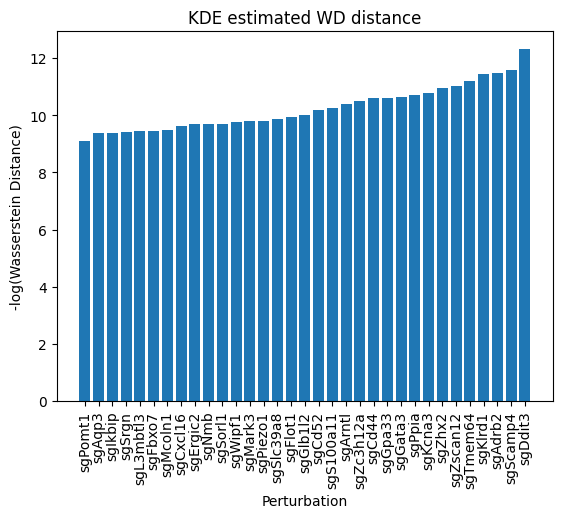

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

plt.bar(d_df.index[:-1], d_df['-log(wd)'][:-1])
plt.xticks(rotation=90)
plt.xlabel("Perturbation")
plt.ylabel("-log(Wasserstein Distance)")
plt.title("KDE estimated WD distance")
plt.show()

In [30]:
from tqdm import tqdm
d_dict = {}

spatial_coords = adata.obsm['spatial']
gene_b_expression = adata[:, 'sgnon-targeting'].X.flatten()
for guide in tqdm(adata.var_names):

    if guide not in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]: continue
    gene_a_expression = adata[:, guide].X.flatten()
    # 为基因 A 和基因 B 创建二维
    kde_a = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]))
    kde_b = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]))

    # 创建网格以评估 KDE
    xmin, ymin = spatial_coords.min(axis=0)
    xmax, ymax = spatial_coords.max(axis=0)
    x, y = np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100)
    z_b = np.linspace(gene_b_expression.min(), gene_b_expression.max(), num=20)
    z_a = np.linspace(gene_a_expression.min(), gene_a_expression.max(), num=20)
    X_a, Y_a, Z_a = np.meshgrid(x, y, z_a)
    X_b, Y_b, Z_b = np.meshgrid(x, y, z_b)
    grid_coords_a = np.vstack([X_a.ravel(), Y_a.ravel(), Z_a.ravel()])
    grid_coords_b = np.vstack([X_b.ravel(), Y_b.ravel(), Z_b.ravel()])

    # 评估 KDE
    Za = kde_a(grid_coords_a)
    Zb = kde_b(grid_coords_b)

    # 计算 Wasserstein 距离
    distance = wasserstein_distance(Za.ravel(), Zb.ravel())
    print(f'The Wasserstein distance between the spatial distributions of NTC ~ {guide} is: {distance}')
    d_dict[guide] = distance

 12%|█▏        | 4/34 [01:57<14:43, 29.43s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgCd44 is: 2.7410351507588172e-11


 32%|███▏      | 11/34 [04:02<08:07, 21.17s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgGata3 is: 2.4934304374835506e-11


 65%|██████▍   | 22/34 [06:02<02:57, 14.81s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgPomt1 is: 8.34566504505982e-10


 91%|█████████ | 31/34 [08:02<00:42, 14.21s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgZc3h12a is: 3.4205827047267393e-11


100%|██████████| 34/34 [10:10<00:00, 17.94s/it]

The Wasserstein distance between the spatial distributions of NTC ~ sgnon-targeting is: 0.0


In [46]:
compute_kde_statsmodels?

Signature: compute_kde_statsmodels(data)
Docstring: <no docstring>
File:      /tmp/ipykernel_30979/3935954528.py
Type:      function

In [50]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def worker(guide):
    print(guide)
    if guide == "sgnon-targeting": return None
    gene_a_expression = adata[:, guide].X.flatten()
    kde_a = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]))
    kde_b = gaussian_kde(np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]))

    xmin, ymin = spatial_coords.min(axis=0)
    xmax, ymax = spatial_coords.max(axis=0)
    x, y = np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100)
    z_b = np.linspace(gene_b_expression.min(), gene_b_expression.max(), num=100)
    z_a = np.linspace(gene_a_expression.min(), gene_a_expression.max(), num=100)
    X_a, Y_a, Z_a = np.meshgrid(x, y, z_a)
    X_b, Y_b, Z_b = np.meshgrid(x, y, z_b)
    grid_coords_a = np.vstack([X_a.ravel(), Y_a.ravel(), Z_a.ravel()])
    grid_coords_b = np.vstack([X_b.ravel(), Y_b.ravel(), Z_b.ravel()])

    Za = kde_a(grid_coords_a)
    Zb = kde_b(grid_coords_b)

    distance = wasserstein_distance(Za.ravel(), Zb.ravel())
    return guide, distance

with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
    results = pool.map(worker, adata.var_names)
    d_dict = dict(filter(None, results))

sgArntlsgAqp3sgAdrb2
sgCd44sgDdit3sgCd52sgCxcl16sgErgic2sgGata3
sgFlot1sgFbxo7
sgGlb1l2sgGpa33sgIkbipsgKcna3
sgKlrd1sgMark3sgL3mbtl3sgNmbsgMcoln1


sgTmem64

sgPpia

sgZscan12sgZc3h12asgWipf1


sgSlc39a8
sgScamp4

sgS100a11
sgPiezo1




sgZhx2
sgSrgn

sgPomt1





sgSorl1
sgnon-targeting


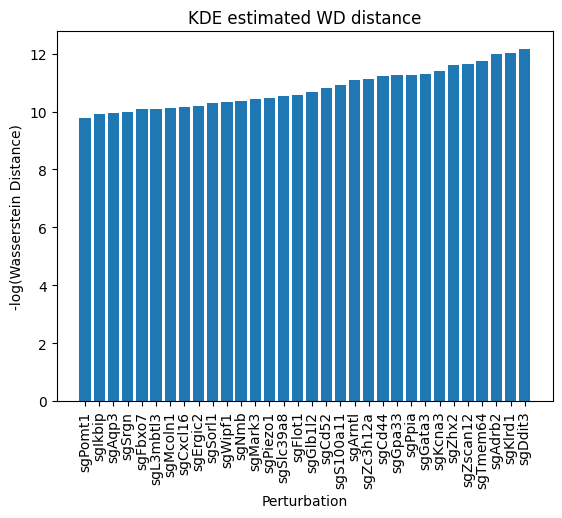

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

plt.bar(d_df.index[:-1], d_df['-log(wd)'][:-1])
plt.xticks(rotation=90)
plt.xlabel("Perturbation")
plt.ylabel("-log(Wasserstein Distance)")
plt.title("KDE estimated WD distance")
plt.show()

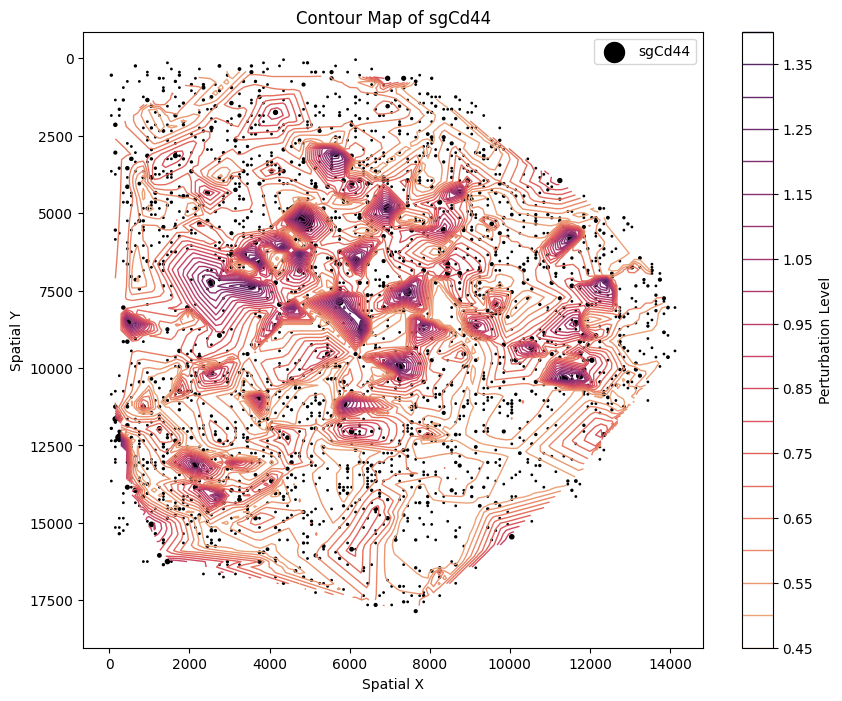

In [105]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_data = adata.copy()
spatial_coords = plot_data.obsm['spatial']
gene_expression = plot_data[:, "sgCd44"].X.toarray().flatten().tolist()

# Create a DataFrame with spatial coordinates and gene expression
df = pd.DataFrame(spatial_coords, columns=['x', 'y'])
df['expression'] = gene_expression

# Filter out points with zero or near-zero expression values
threshold = 2  # You can adjust this threshold based on your data
df_filtered = df[df['expression'] > threshold]

# Create a grid of points for contour plotting
x = df_filtered['x']
y = df_filtered['y']
z = df_filtered['expression']
vmax = 25
z_ = np.array([vmax if z_ > vmax else z_ for z_ in z])
z = np.log10(z_ + 1e-9)

# Create grid values first.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate over grid
from scipy.interpolate import griddata
import matplotlib.cm as cm
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot contour map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
contour = plt.contour(xi, yi, zi, levels=20, linewidths=1, cmap="flare")
utils.plot_dot(adata, gene_name='sgCd44', ax=ax, square=False, color='Black', alpha=1)
plt.legend()

plt.title(f'Contour Map of sgCd44')
plt.xlabel('Spatial X')
plt.ylabel('Spatial Y')
plt.colorbar(label='Perturbation Level')
plt.gca().invert_yaxis()
plt.show()

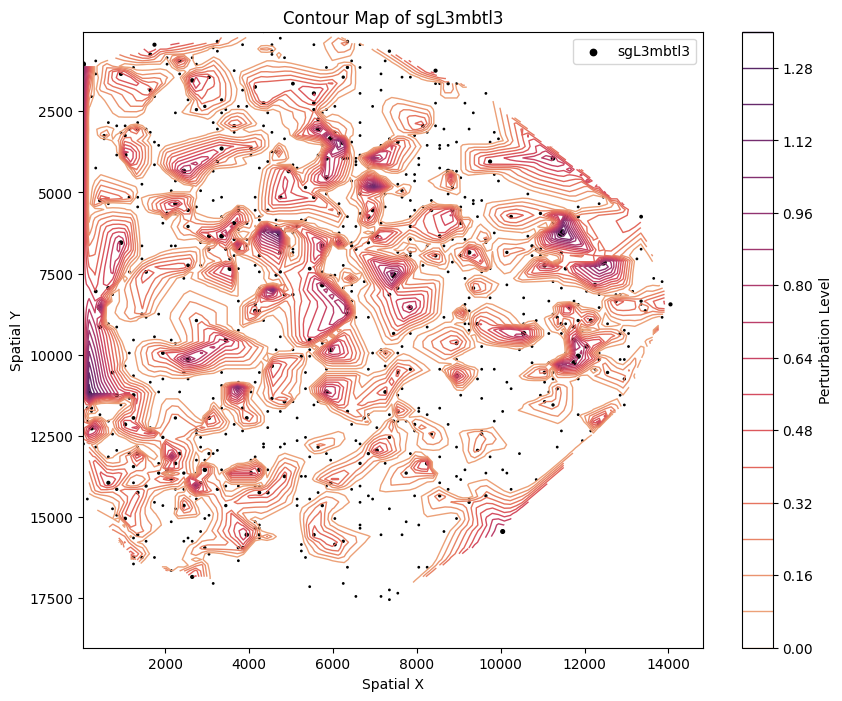

In [126]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_data = adata.copy()
spatial_coords = plot_data.obsm['spatial']
gene_expression = plot_data[:, "sgL3mbtl3"].X.toarray().flatten().tolist()

# Create a DataFrame with spatial coordinates and gene expression
df = pd.DataFrame(spatial_coords, columns=['x', 'y'])
df['expression'] = gene_expression

# Filter out points with zero or near-zero expression values
threshold = 0  # You can adjust this threshold based on your data
df_filtered = df[df['expression'] > threshold]

# Create a grid of points for contour plotting
x = df_filtered['x']
y = df_filtered['y']
z = df_filtered['expression']
vmax = 25
z_ = np.array([vmax if z_ > vmax else z_ for z_ in z])
z = np.log10(z_ + 1e-9)

# Create grid values first.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate over grid
from scipy.interpolate import griddata
import matplotlib.cm as cm
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot contour map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
contour = plt.contour(xi, yi, zi, levels=20, linewidths=1, cmap="flare")
utils.plot_dot(adata, gene_name='sgL3mbtl3', ax=ax, square=False, color='Black', alpha=1)
plt.legend()

plt.title(f'Contour Map of sgL3mbtl3')
plt.xlabel('Spatial X')
plt.ylabel('Spatial Y')
plt.colorbar(label='Perturbation Level')
plt.gca().invert_yaxis()
plt.show()

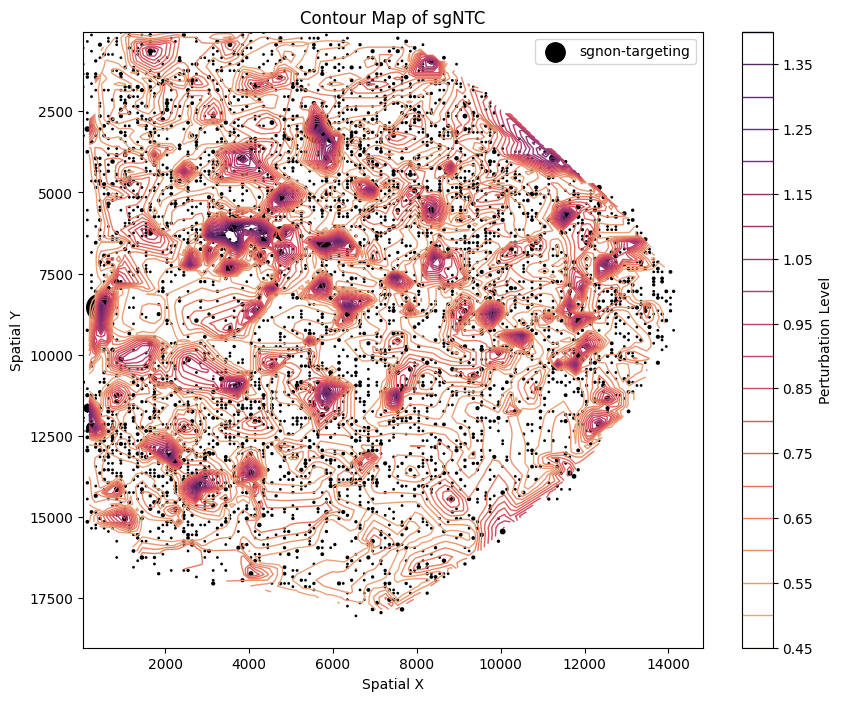

In [127]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_data = adata.copy()
spatial_coords = plot_data.obsm['spatial']
gene_expression = plot_data[:, "sgnon-targeting"].X.toarray().flatten().tolist()

# Create a DataFrame with spatial coordinates and gene expression
df = pd.DataFrame(spatial_coords, columns=['x', 'y'])
df['expression'] = gene_expression

# Filter out points with zero or near-zero expression values
threshold = 2  # You can adjust this threshold based on your data
df_filtered = df[df['expression'] > threshold]

# Create a grid of points for contour plotting
x = df_filtered['x']
y = df_filtered['y']
z = df_filtered['expression']
vmax = 25
z_ = np.array([vmax if z_ > vmax else z_ for z_ in z])
z = np.log10(z_ + 1e-9)

# Create grid values first.
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate over grid
from scipy.interpolate import griddata
import matplotlib.cm as cm
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot contour map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
contour = plt.contour(xi, yi, zi, levels=20, linewidths=1, cmap="flare")
utils.plot_dot(adata, gene_name='sgnon-targeting', ax=ax, square=False, color='Black', alpha=1)
plt.legend()

plt.title(f'Contour Map of sgNTC')
plt.xlabel('Spatial X')
plt.ylabel('Spatial Y')
plt.colorbar(label='Perturbation Level')
plt.gca().invert_yaxis()
plt.show()

In [107]:
adata.obsm['spatial'].max()

18126

In [112]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu', bw=np.array([180, 180, 20]))
    return kde.pdf(data)

def worker(guide):
    #if guide in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]:
    if guide not in ['sgnon-targeting']:
        gene_a_expression = adata[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        return guide, distance
    else:
        return None

if __name__ == "__main__":
    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, adata.var_names)
        d_dict = dict(filter(None, results))


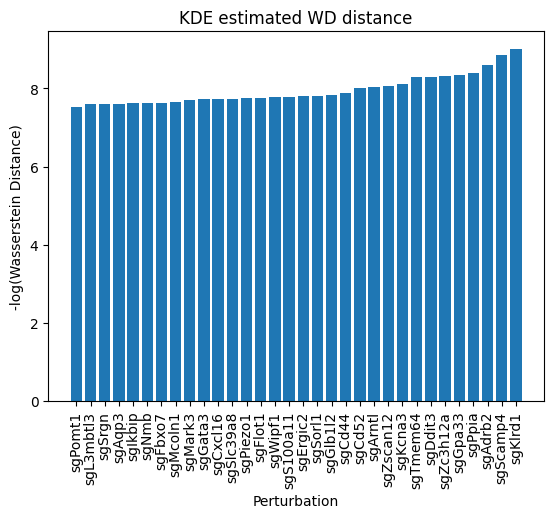

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

plt.bar(d_df.index[:-1], d_df['-log(wd)'][:-1])
plt.xticks(rotation=90)
plt.xlabel("Perturbation")
plt.ylabel("-log(Wasserstein Distance)")
plt.title("KDE estimated WD distance")
plt.show()

In [115]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu', bw=np.array([180, 180, 3]))
    return kde.pdf(data)

def worker(guide):
    #if guide in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]:
    if guide not in ['sgnon-targeting']:
        gene_a_expression = adata[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        return guide, distance
    else:
        return None

if __name__ == "__main__":
    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, adata.var_names)
        d_dict = dict(filter(None, results))


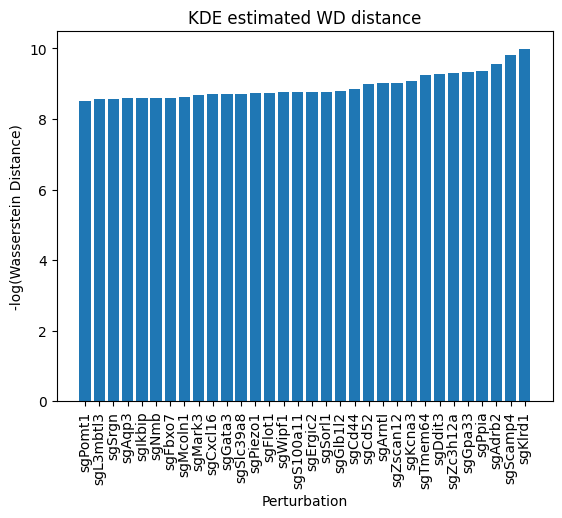

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

plt.bar(d_df.index[:-1], d_df['-log(wd)'][:-1])
plt.xticks(rotation=90)
plt.xlabel("Perturbation")
plt.ylabel("-log(Wasserstein Distance)")
plt.title("KDE estimated WD distance")
plt.show()

In [118]:
adata

AnnData object with n_obs × n_vars = 20544 × 34
    obs: 'score'
    obsm: 'spatial'

In [128]:
from bin import utils
adata = sc.read_h5ad('./RNA/B926-1.guide.bin_100.h5')

adata = utils.combine_guide_replicates(adata)

/home/wpy/stereoseq/20240502-SPACseq/bin/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [130]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu', bw=np.array([180, 180, 3]))
    return kde.pdf(data)
    
d_dict = {}

spatial_coords = adata.obsm['spatial']
gene_b_expression = adata[:, 'sgnon-targeting'].X.flatten()
def worker(guide):
    #if guide in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]:
    if guide not in ['sgnon-targeting']:
        gene_a_expression = adata[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        return guide, distance
    else:
        return None

if __name__ == "__main__":
    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, adata.var_names)
        d_dict = dict(filter(None, results))


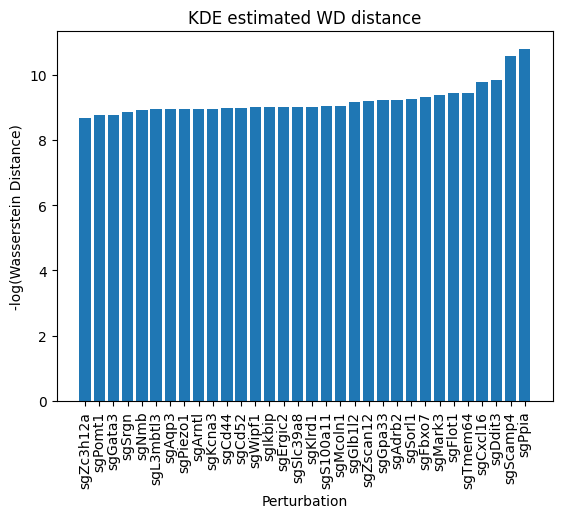

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

plt.bar(d_df.index[:-1], d_df['-log(wd)'][:-1])
plt.xticks(rotation=90)
plt.xlabel("Perturbation")
plt.ylabel("-log(Wasserstein Distance)")
plt.title("KDE estimated WD distance")
plt.show()

In [3]:
from bin import utils
adata = sc.read_h5ad('./RNA/B926-1.guide.bin_100.h5')

In [2]:
import anndata as ad
import pandas as pd
sgs = adata.var_names.str.split('ing_', n=1).str[0]
sgs_grouped = pd.DataFrame(adata.X.toarray(), columns=adata.var_names)
sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()

cgdata = ad.AnnData(sgs_grouped, obs=adata.obs, var=pd.DataFrame(index=sgs_grouped.columns))
cgdata.obsm['spatial'] = adata.obsm['spatial']
adata = cgdata.copy()

NameError: name 'adata' is not defined

In [5]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu', bw=np.array([180, 180, 3]))
    return kde.pdf(data)
    
d_dict = {}

spatial_coords = adata.obsm['spatial']
gene_b_expression = adata[:, 'sgnon-target'].X.flatten()
def worker(guide):
    #if guide in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]:
    if guide not in ['sgnon-target']:
        gene_a_expression = adata[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        return guide, distance
    else:
        return None

if __name__ == "__main__":
    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, adata.var_names)
        d_dict = dict(filter(None, results))

In [6]:
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

In [7]:
c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)
c_df

,-log(wd),-log(wd)_1,-log(wd)_2
guide,,,
sgPomt1,8.676516,8.738491,8.676516
sgPiezo1,8.687442,8.687442,8.933477
sgS100a11,8.712131,8.712131,8.994540
sgL3mbtl3,8.718483,8.718483,8.895713
sgMcoln1,8.732878,8.732878,8.995505
sgIkbip,8.738529,8.738529,8.946230
sgGlb1l2,8.750147,9.085457,8.750147
sgDdit3,8.759951,8.759951,9.556056
sgArntl,8.767640,8.767640,8.868731


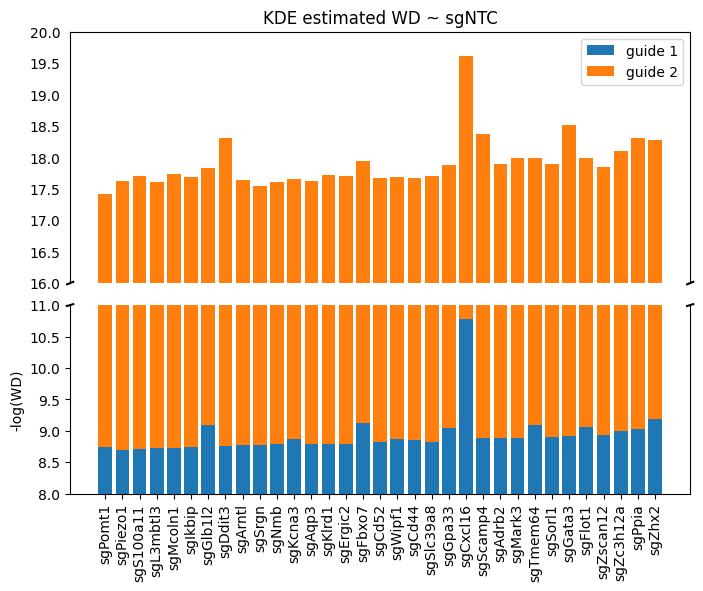

In [9]:
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6),
                              gridspec_kw={'height_ratios': [4, 3], 'hspace': 0.1})

# Plot the same data on both axes
ax.bar(c_df.index, c_df['-log(wd)_1'], label='guide 1', color='tab:blue')
ax.bar(c_df.index, c_df['-log(wd)_2'], bottom=c_df['-log(wd)_1'], label='guide 2', color='tab:orange')
ax2.bar(c_df.index, c_df['-log(wd)_1'], label='guide 1', color='tab:blue')
ax2.bar(c_df.index, c_df['-log(wd)_2'], bottom=c_df['-log(wd)_1'], label='guide 2', color='tab:orange')

# Break the y-axis between these y-values
ax.set_ylim(16, 20)  # Upper plot shows the top of the data
ax2.set_ylim(8, 11)  # Lower plot shows the bottom of the data

# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Hide the ticks on the upper plot bottom and lower plot top
ax.xaxis.tick_top()
ax.tick_params(labeltop=False, color='white')  # Don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Optionally, add diagonal lines to indicate the break
d = 0.005  # Size of diagonal lines
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal
ax.legend()

kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal
ax2.set_xticks(range(33))
ax2.set_xticklabels(c_df.index)

ax.set_title('KDE estimated WD ~ sgNTC')
plt.xticks(rotation=90)
plt.ylabel('-log(WD)')
plt.show()

In [69]:
sort_1 = pd.DataFrame(range(33), index=c_df.sort_values(by='-log(wd)_1').index).to_dict()[0]
sort_2 = pd.DataFrame(range(33), index=c_df.sort_values(by='-log(wd)_2').index).to_dict()[0]
c_df['order_1'] = c_df.index.map(sort_1)
c_df['order_2'] = c_df.index.map(sort_2)
c_df['order'] = c_df[['order_1', 'order_2']].sum(axis=1)
c_df = c_df.sort_values(by='order')

In [70]:
c_df

,-log(wd),-log(wd)_1,-log(wd)_2,order_1,order_2,order
guide,,,,,,
sgPomt1,8.676516,8.738491,8.676516,4,0,4
sgSrgn,8.770433,8.770433,8.773979,8,2,10
sgNmb,8.787912,8.787912,8.813513,9,5,14
sgL3mbtl3,8.718483,8.718483,8.895713,2,14,16
sgArntl,8.767640,8.767640,8.868731,7,12,19
sgKcna3,8.790996,8.867791,8.790996,17,3,20
sgPiezo1,8.687442,8.687442,8.933477,0,20,20
sgAqp3,8.793063,8.793063,8.838493,10,10,20
sgCd44,8.817499,8.853490,8.817499,15,7,22


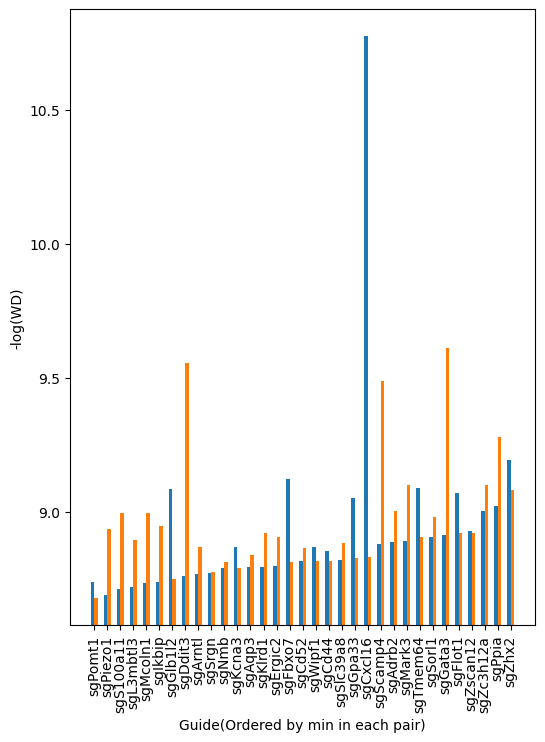

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

In [3]:
from bin import utils
adata = sc.read_h5ad('./RNA/B926-1.guide.bin_100.h5')

import anndata as ad
import pandas as pd
sgs = adata.var_names.str.split('ing_', n=1).str[0]
sgs_grouped = pd.DataFrame(adata.X.toarray(), columns=adata.var_names)
sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()

cgdata = ad.AnnData(sgs_grouped, obs=adata.obs, var=pd.DataFrame(index=sgs_grouped.columns))
cgdata.obsm['spatial'] = adata.obsm['spatial']
adata = cgdata.copy()

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)
    
d_dict = {}

spatial_coords = adata.obsm['spatial']
gene_b_expression = adata[:, 'sgnon-target'].X.flatten()
def worker(guide):
    #if guide in ["sgCd44", "sgGata3", "sgZc3h12a", "sgPomt1", "sgnon-targeting"]:
    if guide not in ['sgnon-target']:
        gene_a_expression = adata[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        return guide, distance
    else:
        return None

with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
    results = pool.map(worker, adata.var_names)
    d_dict = dict(filter(None, results))

/tmp/ipykernel_11129/2069839528.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


NameError: name 'plt' is not defined

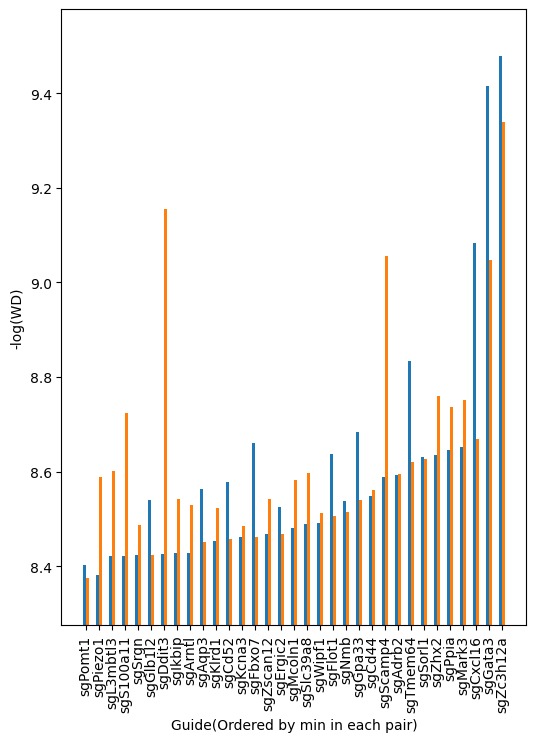

In [4]:
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

# Guide cleaning and normalization.

In [30]:
from bin import utils
# adata = sc.read_h5ad('./RNA/Multitime.filtered.guide.bin20.h5')
adata = sc.read_h5ad('../20240702-Exclusive/RNA/spatial.filtered.guide.bin20.h5')

Suppose that each bin20 has at most 4 guide (even with more than 4 guide, it cannot imply more cells with perturbation). Then we normalize the cell with vmax of guide using 0, 1, 2, 3, 4 as perturbation strength.

In [31]:
# first filter out those data points without any guide
filtered_data = adata[adata.X.sum(axis=1) > 0].copy()

In [32]:
filtered_data.layers['raw_counts'] = filtered_data.X.copy()

In [5]:
# set counts with >4 with 4
# filtered_data.X[(filtered_data.X > 4)] = 4

In [33]:
# integrating non-targeting gene
import anndata as ad
import pandas as pd
sgs = filtered_data.var_names.str.split('ing_', n=1).str[0]
sgs_grouped = pd.DataFrame(filtered_data.X.toarray(), columns=filtered_data.var_names)
sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()

cgdata = ad.AnnData(sgs_grouped, obs=filtered_data.obs, var=pd.DataFrame(index=sgs_grouped.columns))
cgdata.obsm['spatial'] = filtered_data.obsm['spatial']
filtered_data = cgdata.copy()

/tmp/ipykernel_28737/3155082317.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


Text(0.5, 0, 'x')

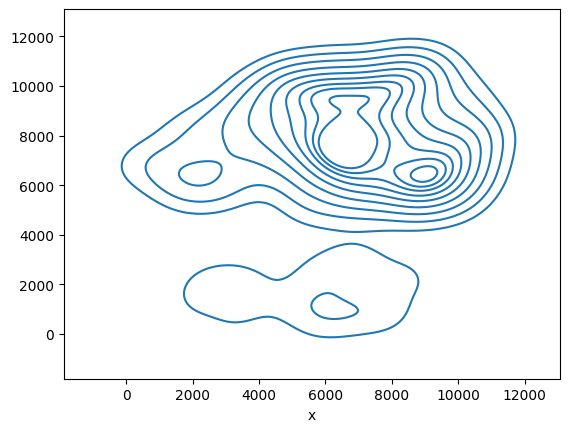

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x=f_data.obsm['spatial'][:, 0], y=f_data.obsm['spatial'][:, 1])
plt.xlabel('x')

In [39]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

f_data = filtered_data[filtered_data.obs.marker == 'B'].copy()
f_data = f_data[f_data.obsm['spatial'][:, 1] < 6500].copy()

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, f_data = args
    if guide not in ['sgnon-target']:
        gene_a_expression = f_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(f_data):
    spatial_coords = f_data.obsm['spatial']
    gene_b_expression = f_data[:, 'sgnon-target'].X.flatten()

    args_list = [(guide, spatial_coords, gene_b_expression, f_data) for guide in f_data.var_names]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

d_dict = calculate_bin_distribution(f_data)


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divi

> sgAckr3_2 done!
> sgBatf_2 done!> sgAckr3_1 done!> sgBcl2_1 done!
> sgBcl2_2 done!


> sgBcl2l11_1 done!

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgBatf_1 done!
> sgCcr10_1 done!
> sgBcl2l11_2 done!

> sgBhlhe40_1 done!


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgCcr1_1 done!

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)




> sgCcr1_2 done!> sgCcr4_1 done!> sgCcr10_2 done!
> sgCcr7_1 done!

> sgCcr2_1 done!> sgCcr6_1 done!


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgCcr6_2 done!



/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgCxcr1_1 done!> sgCxcr2_1 done!
> sgBhlhe40_2 done!


> sgCd74_2 done!> sgCxcr3_1 done!> sgCcr7_2 done!> sgCxcr5_1 done!


> sgCcr5_2 done!> sgCxcr5_2 done!
> sgCxcr4_2 done!

> sgCxcr6_1 done!> sgCxcr4_1 done!

> sgDdit4_1 done!> sgCcr5_1 done!

> sgCd74_1 done!> sgDdit4_2 done!

> sgFos_1 done!
> sgFoxp1_1 done!> sgFoxp1_2 done!

> sgGpr35_1 done!
> sgGpr35_2 done!> sgHopx_1 done!

> sgHopx_2 done!
> sgJun_1 done!
> sgCxcr1_2 done!
> sgJund_2 done!> sgKlf2_1 done!

> sgKlf2_2 done!
> sgElob_2 done!
> sgTgif1_2 done!> sgElob_1 done!

> sgTox_2 done!> sgYbx1_1 done!

> sgYbx1_2 done!
> sgJund_1 done!
> sgTgif1_1 done!
> sgJun_2 done!


In [36]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

f_data = filtered_data[filtered_data.obs.marker == 'A'].copy()
f_data = f_data[f_data.obsm['spatial'][:, 1] > 4000].copy()

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, f_data = args
    if guide not in ['sgnon-target']:
        gene_a_expression = f_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(f_data):
    spatial_coords = f_data.obsm['spatial']
    gene_b_expression = f_data[:, 'sgnon-target'].X.flatten()

    args_list = [(guide, spatial_coords, gene_b_expression, f_data) for guide in f_data.var_names]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

d_dict = calculate_bin_distribution(f_data)


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgBcl2l11_2 done!
> sgBatf_2 done!
> sgBhlhe40_2 done!
> sgBatf_1 done!
> sgCd74_2 done!
> sgCxcr4_1 done!> sgAckr3_2 done!

> sgCcr2_1 done!
> sgBcl2_1 done!> sgAckr3_1 done!

> sgBcl2l11_1 done!> sgCxcr6_1 done!

> sgCxcr4_2 done!> sgCxcr5_2 done!
> sgCxcr5_1 done!



/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgCcr5_1 done!
> sgCcr10_2 done!
> sgBhlhe40_1 done!> sgBcl2_2 done!> sgCxcr2_1 done!


> sgCcr7_1 done!
> sgCcr1_2 done!
> sgCxcr3_1 done!
> sgCcr6_1 done!
> sgCcr1_1 done!> sgCcr10_1 done!

> sgCcr5_2 done!
> sgCxcr1_1 done!
> sgCcr6_2 done!
> sgCcr4_1 done!
> sgCxcr1_2 done!
> sgCcr7_2 done!
> sgCd74_1 done!
> sgDdit4_1 done!
> sgDdit4_2 done!
> sgFos_1 done!
> sgJun_1 done!
> sgJund_1 done!
> sgHopx_2 done!
> sgElob_1 done!> sgElob_2 done!

> sgGpr35_1 done!
> sgHopx_1 done!
> sgFoxp1_2 done!
> sgKlf2_1 done!
> sgGpr35_2 done!
> sgFoxp1_1 done!
> sgTgif1_1 done!
> sgJun_2 done!
> sgYbx1_1 done!
> sgTgif1_2 done!
> sgJund_2 done!
> sgYbx1_2 done!
> sgKlf2_2 done!
> sgTox_2 done!


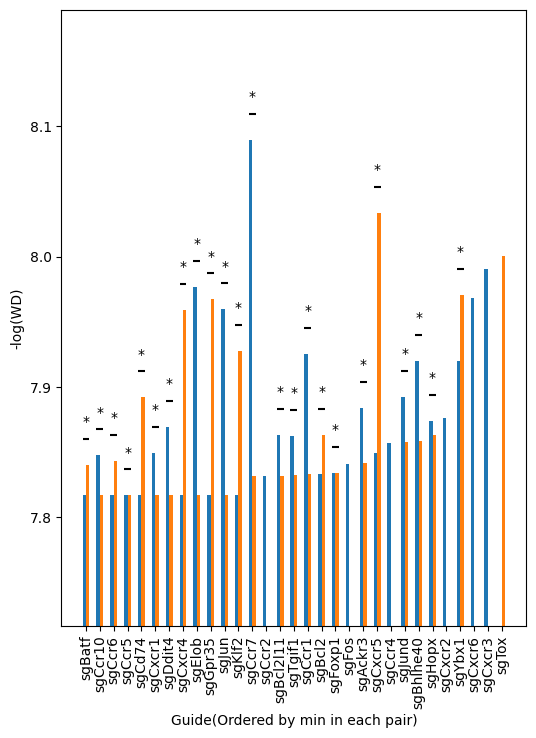

In [40]:
# plot and show result
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
for guide in c_df.index:
    if guide + '_1' in d_df.index:
        c_df.loc[guide, '-log(wd)_1'] = d_df.loc[guide + '_1', '-log(wd)']
    else:
        c_df.loc[guide, '-log(wd)_1'] = 0
    if guide + '_2' in d_df.index:
        c_df.loc[guide, '-log(wd)_2'] = d_df.loc[guide + '_2', '-log(wd)']
    else:
        c_df.loc[guide, '-log(wd)_2'] = 0
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    if (c_df.loc[name, '-log(wd)_1'] > 0) and (c_df.loc[name, '-log(wd)_2'] > 0):
        ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
        ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.loc[(c_df['-log(wd)_1'] > 0) & (c_df['-log(wd)_2'] > 0), :]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

/tmp/ipykernel_17101/3380601121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pdf, x='index', y='WD', palette='Blues')


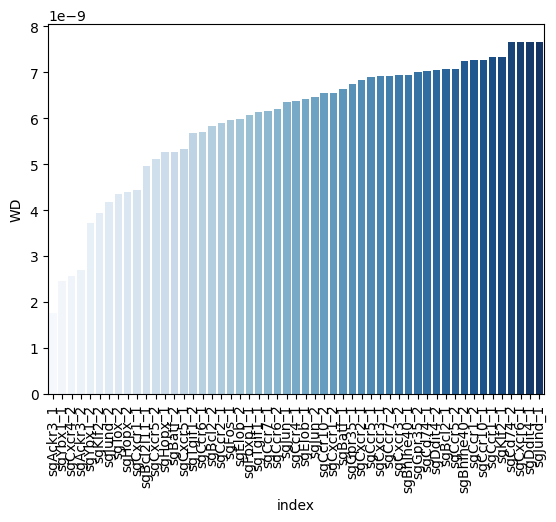

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
pdf = pd.DataFrame(d_dict, index=['WD']).T.reset_index().sort_values(by='WD')
sns.barplot(pdf, x='index', y='WD', palette='Blues')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_28737/3636558485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cdf, x='index', y='Counts', palette='Blues')


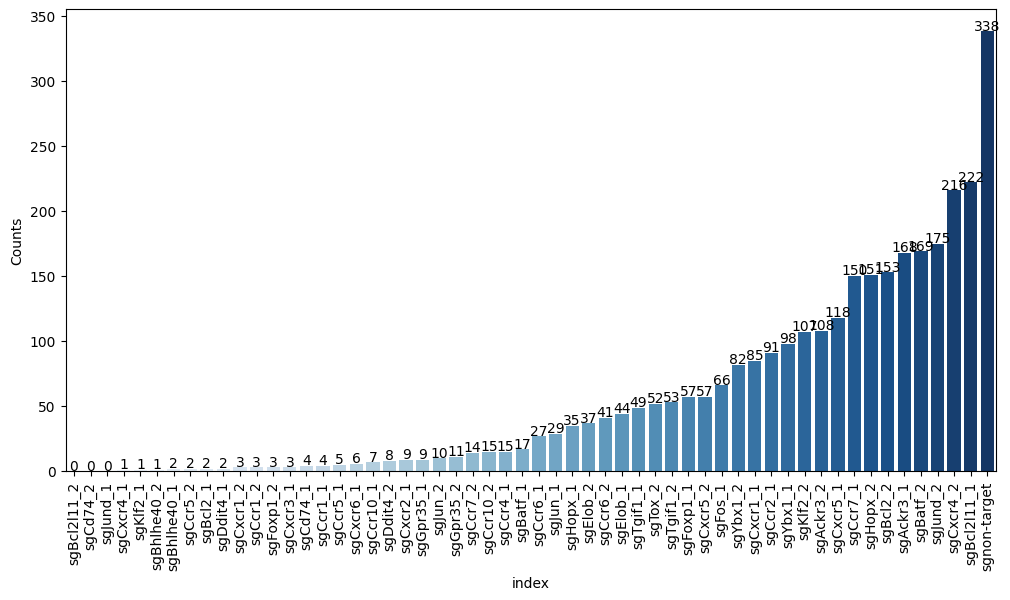

In [37]:
cdf = pd.DataFrame(f_data.X.sum(axis=0), columns=['Counts'], index=f_data.var_names).reset_index().sort_values(by='Counts').reset_index(drop=True)
plt.figure(figsize=(12, 6))
for idx in cdf.index:
    plt.text(idx, cdf.loc[idx, 'Counts'] + 1, cdf.loc[idx, 'Counts'], ha='center')
sns.barplot(cdf, x='index', y='Counts', palette='Blues')
plt.xticks(rotation=90)
plt.show()

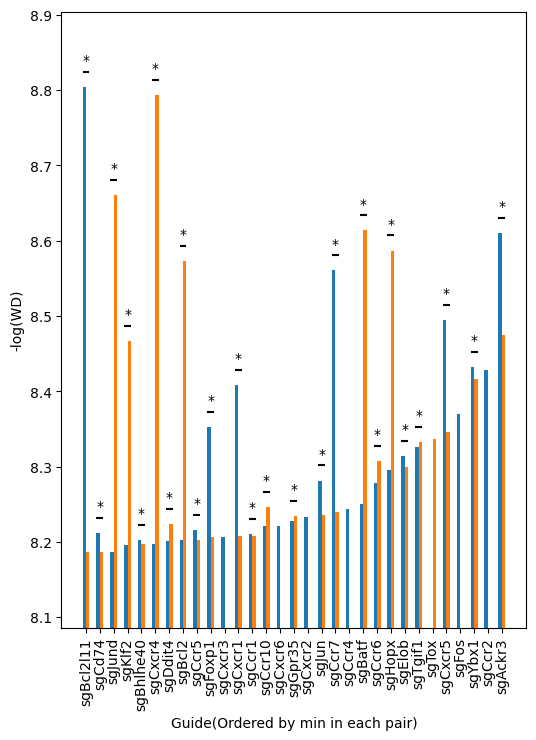

In [38]:
# plot and show result
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
for guide in c_df.index:
    if guide + '_1' in d_df.index:
        c_df.loc[guide, '-log(wd)_1'] = d_df.loc[guide + '_1', '-log(wd)']
    else:
        c_df.loc[guide, '-log(wd)_1'] = 0
    if guide + '_2' in d_df.index:
        c_df.loc[guide, '-log(wd)_2'] = d_df.loc[guide + '_2', '-log(wd)']
    else:
        c_df.loc[guide, '-log(wd)_2'] = 0
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    if (c_df.loc[name, '-log(wd)_1'] > 0) and (c_df.loc[name, '-log(wd)_2'] > 0):
        ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
        ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.loc[(c_df['-log(wd)_1'] > 0) & (c_df['-log(wd)_2'] > 0), :]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

In [7]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

f_data = filtered_data[filtered_data.obs.marker == 'B924-1'].copy()

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, f_data = args
    if guide not in ['sgnon-targeting']:
        gene_a_expression = f_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(f_data):
    spatial_coords = f_data.obsm['spatial']
    gene_b_expression = f_data[:, 'sgnon-targeting'].X.flatten()

    args_list = [(guide, spatial_coords, gene_b_expression, f_data) for guide in f_data.var_names]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

d_dict = calculate_bin_distribution(f_data)

> sgGlb1l2_2_gene done!
> sgIkbip_1_gene done!
> sgFlot1_1_gene done!
> sgL3mbtl3_1_gene done!
> sgErgic2_1_gene done!
> sgKcna3_2_gene done!
> sgGpa33_2_gene done!
> sgKlrd1_1_gene done!
> sgIkbip_2_gene done!
> sgFbxo7_2_gene done!
> sgFbxo7_1_gene done!
> sgGpa33_1_gene done!
> sgFlot1_2_gene done!
> sgKcna3_1_gene done!
> sgDdit3_1_gene done!
> sgGata3_2_gene done!
> sgAqp3_1_gene done!
> sgCd52_2_gene done!
> sgErgic2_2_gene done!
> sgAdrb2_2_gene done!
> sgGlb1l2_1_gene done!
> sgDdit3_2_gene done!
> sgCxcl16_2_gene done!
> sgKlrd1_2_gene done!
> sgGata3_1_gene done!
> sgCxcl16_1_gene done!
> sgCd44_2_gene done!
> sgCd52_1_gene done!
> sgArntl_1_gene done!
> sgAdrb2_1_gene done!
> sgAqp3_2_gene done!
> sgCd44_1_gene done!
> sgArntl_2_gene done!
> sgL3mbtl3_2_gene done!
> sgPiezo1_1_gene done!> sgNmb_1_gene done!

> sgMark3_1_gene done!
> sgMark3_2_gene done!
> sgS100a11_1_gene done!
> sgMcoln1_2_gene done!
> sgPomt1_1_gene done!
> sgPpia_2_gene done!
> sgMcoln1_1_gene done!
> sgS

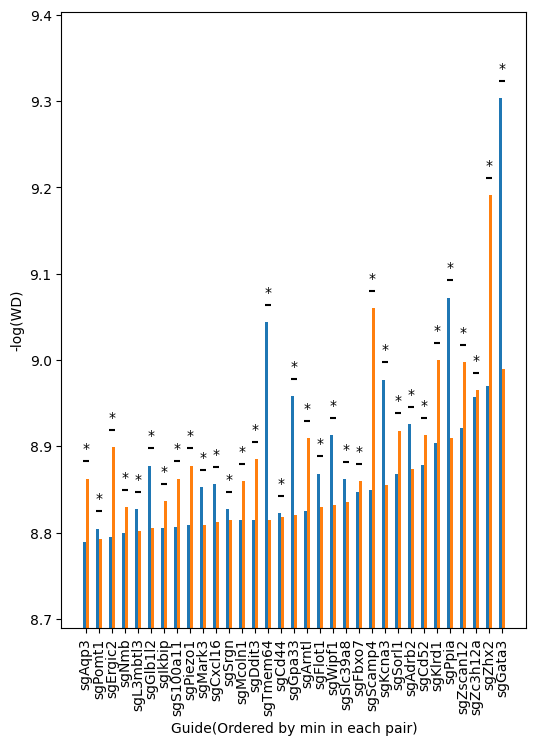

In [9]:
# plot and show result
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
    ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

In [10]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

f_data = filtered_data[filtered_data.obs.marker == 'B924-2'].copy()

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, f_data = args
    if guide not in ['sgnon-targeting']:
        gene_a_expression = f_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(f_data):
    spatial_coords = f_data.obsm['spatial']
    gene_b_expression = f_data[:, 'sgnon-targeting'].X.flatten()

    args_list = [(guide, spatial_coords, gene_b_expression, f_data) for guide in f_data.var_names]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

d_dict = calculate_bin_distribution(f_data)

> sgKcna3_2_gene done!
> sgKlrd1_1_gene done!
> sgIkbip_1_gene done!
> sgIkbip_2_gene done!
> sgKlrd1_2_gene done!
> sgFbxo7_2_gene done!
> sgFbxo7_1_gene done!
> sgCd44_2_gene done!


/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)


> sgFlot1_1_gene done!
> sgErgic2_1_gene done!
> sgAdrb2_1_gene done!
> sgArntl_2_gene done!
> sgAqp3_1_gene done!
> sgCd52_1_gene done!
> sgAdrb2_2_gene done!
> sgCxcl16_2_gene done!
> sgKcna3_1_gene done!
> sgL3mbtl3_1_gene done!
> sgCd44_1_gene done!
> sgGlb1l2_1_gene done!
> sgGlb1l2_2_gene done!
> sgGpa33_2_gene done!
> sgFlot1_2_gene done!
> sgErgic2_2_gene done!
> sgGpa33_1_gene done!
> sgDdit3_1_gene done!
> sgAqp3_2_gene done!
> sgGata3_2_gene done!
> sgArntl_1_gene done!
> sgDdit3_2_gene done!
> sgCxcl16_1_gene done!
> sgGata3_1_gene done!
> sgCd52_2_gene done!
> sgPiezo1_1_gene done!
> sgL3mbtl3_2_gene done!
> sgMark3_1_gene done!
> sgMcoln1_1_gene done!
> sgMark3_2_gene done!
> sgMcoln1_2_gene done!
> sgNmb_1_gene done!
> sgPiezo1_2_gene done!
> sgPomt1_1_gene done!
> sgPomt1_2_gene done!
> sgS100a11_1_gene done!
> sgPpia_1_gene done!
> sgPpia_2_gene done!
> sgS100a11_2_gene done!
> sgNmb_2_gene done!
> sgScamp4_2_gene done!
> sgScamp4_1_gene done!
> sgSrgn_1_gene done!
> s

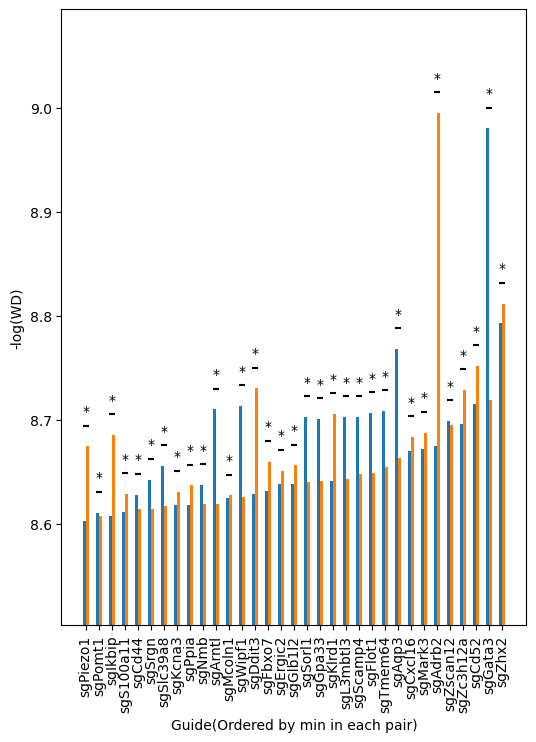

In [11]:
# plot and show result
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
    ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

In [12]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

f_data = filtered_data[filtered_data.obs.marker == 'B926-2'].copy()

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, f_data = args
    if guide not in ['sgnon-targeting']:
        gene_a_expression = f_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(f_data):
    spatial_coords = f_data.obsm['spatial']
    gene_b_expression = f_data[:, 'sgnon-targeting'].X.flatten()

    args_list = [(guide, spatial_coords, gene_b_expression, f_data) for guide in f_data.var_names]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

d_dict = calculate_bin_distribution(f_data)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/statsmodels/nonparametric/kernels.py:62: RuntimeWarning: invalid value encountered in divide
  kernel_value = np.ones(Xi.size) * h / (num_levels - 1)
Process ForkPoolWorker-91:
Process ForkPoolWorker-79:
Process ForkPoolWorker-89:
Process ForkPoolWorker-110:
Process ForkPoolWorker-107:
Process ForkPoolWorker-112:
Process ForkPoolWorker-94:
Process ForkPoolWorker-105:
Process ForkPoolWorker-102:
Process ForkPoolWorker-109:
Process ForkPoolWorker-90:
Process ForkPoolWorker-82:
Process ForkPoolWorker-104:
Process ForkPoolWorker-71:
Process ForkPoolWorker-67:
Process ForkPoolWorker-106:
Process ForkPoolWorker-81:
Process ForkPoolWorker-84:
Process ForkPoolWorker-108:
Process ForkPoolWorker-113:
Process ForkPoolWorker-103:
Process ForkPoolWorker-101:
Process ForkPoolWorker-114:
Process ForkPoolWorker-72:
Process ForkPoolWorker-76:
Process ForkPoolWorker-80:
Process ForkPoolWorker-75:
Process ForkPoolWorker-111:
Process ForkPoolWo

KeyboardInterrupt: 

In [ ]:
# plot and show result
import matplotlib.pyplot as plt
d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
    ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

In [9]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool
import itertools

guide = 'sgGata3_1_gene'

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

spatial_coords = filtered_data.obsm['spatial']
gene_b_expression = filtered_data[:, 'sgnon-target'].X.flatten()
gene_a_expression = filtered_data[:, guide].X.flatten()

data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T

Za = compute_kde_statsmodels(data_a)
Zb = compute_kde_statsmodels(data_b)

actual_distance = wasserstein_distance(Za, Zb)
actual_distance

2.9904586317996096e-10

In [14]:
sns.kdeplot?

Object `sns.kdeplot` not found.


In [12]:
Za.shape

(18716,)

In [97]:
import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool
import itertools

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, gene_b_expression, filtered_data = args
    if guide not in ['sgnon-target']:
        gene_a_expression = filtered_data[:, guide].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        actual_distance = wasserstein_distance(Za, Zb)
        
        combined_expression = np.concatenate([gene_a_expression, gene_b_expression])
        permuted_distances = []
        np.random.seed(42)  # For reproducibility
        
        # for i in range(200):  # Number of permutations
        #     print(f'{guide} permutation {i}')
        #     np.random.shuffle(combined_expression)
        #     permuted_a = combined_expression[:len(gene_a_expression)]
        #     permuted_b = combined_expression[len(gene_a_expression):]
            
        #     permuted_data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], permuted_a]).T
        #     permuted_data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], permuted_b]).T
            
        #     permuted_Za = compute_kde_statsmodels(permuted_data_a)
        #     permuted_Zb = compute_kde_statsmodels(permuted_data_b)
            
        #     permuted_distance = wasserstein_distance(permuted_Za, permuted_Zb)
        #     permuted_distances.append(permuted_distance)
        
        # p_value = np.sum(np.array(permuted_distances) >= actual_distance) / len(permuted_distances)
        
        return guide, actual_distance#, p_value
    else:
        return None

spatial_coords = filtered_data.obsm['spatial']
gene_b_expression = filtered_data[:, 'sgnon-target'].X.flatten()

with Pool(processes=66) as pool:
    results = pool.map(worker, [(guide, spatial_coords, gene_b_expression, filtered_data) for guide in filtered_data.var_names])
    d_df = pd.DataFrame(filter(None, results), columns=['name', 'wd', 'p_value'])
    d_df = d_df.set_index('name').iloc[:, :-1]
    d_df.write_csv('./kde.result.csv', sep='\t', index=False, header=True)

sgIkbip_2_gene permutation 0
sgErgic2_2_gene permutation 0
sgFbxo7_2_gene permutation 0
sgGata3_1_gene permutation 0
sgGlb1l2_2_gene permutation 0
sgCxcl16_1_gene permutation 0
sgDdit3_1_gene permutation 0
sgCd52_1_gene permutation 0
sgArntl_2_gene permutation 0
sgDdit3_2_gene permutation 0
sgCxcl16_2_gene permutation 0
sgAdrb2_1_gene permutation 0
sgCd44_2_gene permutation 0
sgKcna3_1_gene permutation 0
sgL3mbtl3_1_gene permutation 0
sgIkbip_1_gene permutation 0
sgKlrd1_2_gene permutation 0
sgCd52_2_gene permutation 0
sgGpa33_2_gene permutation 0
sgKcna3_2_gene permutation 0
sgFlot1_2_gene permutation 0
sgGlb1l2_1_gene permutation 0
sgFlot1_1_gene permutation 0
sgArntl_1_gene permutation 0
sgAqp3_2_gene permutation 0
sgGpa33_1_gene permutation 0
sgCd44_1_gene permutation 0
sgAqp3_1_gene permutation 0
sgAdrb2_2_gene permutation 0
sgErgic2_1_gene permutation 0
sgFbxo7_1_gene permutation 0
sgKlrd1_1_gene permutation 0
sgGata3_2_gene permutation 0
sgCxcl16_1_gene permutation 1
sgErgic2_2_

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [14]:
a = pd.DataFrame()
a.to_csv?

Signature:
a.to_csv(
    path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,
    *,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | Callable | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    lineterminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'OpenFileErrors' = 'strict',
    storage_options: 'StorageOptions | None' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str, path object, file-like object, 

In [116]:
d_df = pd.DataFrame(filter(None, results), columns=['name', 'wd', 'p_value'])
d_df = d_df.set_index('name').iloc[:, :-1]
d_df

,wd
name,
sgAdrb2_1_gene,8.143387e-10
sgAdrb2_2_gene,6.360215e-10
sgAqp3_1_gene,9.705061e-10
sgAqp3_2_gene,8.931044e-10
sgArntl_1_gene,1.042529e-09
...,...
sgZc3h12a_2_gene,3.056309e-10
sgZhx2_1_gene,4.625289e-10
sgZhx2_2_gene,5.739062e-10


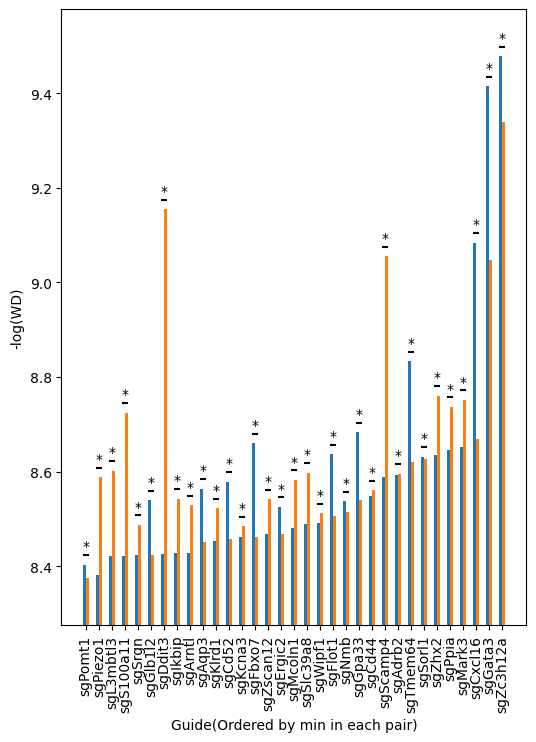

In [11]:
# plot and show result
#d_df = pd.DataFrame(d_dict, index=['wd']).T
d_df['guide'] = d_df.index.str.split('_').str.get(0)
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()

c_df = d_df.groupby('guide').min()
c_df['-log(wd)_1'] = d_df[d_df.index.str.endswith('_1_gene')]['-log(wd)'].tolist()
c_df['-log(wd)_2'] = d_df[d_df.index.str.endswith('_2_gene')]['-log(wd)'].tolist()
c_df = c_df.iloc[:, -3:]
c_df.sort_values(by='-log(wd)', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
positions =np.arange(len(c_df)) * 2
width = 0.5

ax.bar(positions - width/2, np.array(c_df.iloc[:, -2]).flatten(), width=width, label='1')
ax.bar(positions + width/2, np.array(c_df.iloc[:, -1]).flatten(), width=width, label='2')

for idx, name in enumerate(c_df.index):
    ax.hlines(y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.02, xmin=2*idx-0.5, xmax=2*idx+0.5, colors='black')
    ax.text(x=2*idx, y=max([c_df.iloc[idx]['-log(wd)_1'], c_df.iloc[idx]['-log(wd)_2']]) + 0.03, s='*', ha='center')

ax.set_xticks(positions)
ax.set_xticklabels(c_df.index, rotation=90)
ax.set_xlabel('Guide(Ordered by min in each pair)')
ax.set_ylabel('-log(WD)')
ax.set_ylim(np.min(c_df.iloc[:, -2:]) - 0.1, np.max(c_df.iloc[:, -2:]) + 0.1)
plt.show()

Index(['sgAdrb2', 'sgAqp3', 'sgArntl', 'sgCd44', 'sgCd52', 'sgCxcl16',
       'sgDdit3', 'sgErgic2', 'sgFbxo7', 'sgFlot1', 'sgGata3', 'sgGlb1l2',
       'sgGpa33', 'sgIkbip', 'sgKcna3', 'sgKlrd1', 'sgL3mbtl3', 'sgMark3',
       'sgMcoln1', 'sgNmb', 'sgPiezo1', 'sgPomt1', 'sgPpia', 'sgS100a11',
       'sgScamp4', 'sgSlc39a8', 'sgSorl1', 'sgSrgn', 'sgTmem64', 'sgWipf1',
       'sgZc3h12a', 'sgZhx2', 'sgZscan12', 'sgnon-target'],
      dtype='object')

In [14]:
# calculate bin distribution with filtered data

import numpy as np
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import wasserstein_distance
from multiprocessing import Pool

def compute_kde_statsmodels(data):
    kde = KDEMultivariate(data, var_type='ccu')
    return kde.pdf(data)

def worker(args):
    guide, spatial_coords, filtered_data = args
    if guide not in ['sgnon-target']:
        gene_a_expression = filtered_data[:, guide + '_1_gene'].X.flatten()
        gene_b_expression = filtered_data[:, guide + '_2_gene'].X.flatten()
        data_a = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_a_expression]).T
        data_b = np.vstack([spatial_coords[:, 0], spatial_coords[:, 1], gene_b_expression]).T
        
        Za = compute_kde_statsmodels(data_a)
        Zb = compute_kde_statsmodels(data_b)
        
        distance = wasserstein_distance(Za, Zb)
        print('> ' + guide + ' done!')
        return guide, distance
    else:
        return None

def calculate_bin_distribution(filtered_data):
    spatial_coords = filtered_data.obsm['spatial']

    args_list = [(guide, spatial_coords, filtered_data) for guide in filtered_data.var_names.str.split('_').str.get(0).unique()]

    with Pool(processes=33) as pool:  # Adjust the number of processes according to your CPU
        results = pool.map(worker, args_list)
        
    d_dict = dict(filter(None, results))
    return d_dict

r_dict = calculate_bin_distribution(filtered_data)

> sgGata3 done!
> sgPomt1 done!
> sgMcoln1 done!
> sgNmb done!
> sgL3mbtl3 done!
> sgErgic2 done!
> sgCd52 done!
> sgGpa33 done!
> sgMark3 done!
> sgArntl done!
> sgZhx2 done!
> sgAqp3 done!
> sgCxcl16 done!
> sgZc3h12a done!
> sgSrgn done!
> sgS100a11 done!
> sgSlc39a8 done!
> sgKlrd1 done!
> sgZscan12 done!
> sgPiezo1 done!
> sgTmem64 done!
> sgKcna3 done!
> sgIkbip done!
> sgSorl1 done!
> sgScamp4 done!
> sgGlb1l2 done!
> sgFbxo7 done!
> sgPpia done!
> sgWipf1 done!
> sgDdit3 done!
> sgCd44 done!
> sgFlot1 done!
> sgAdrb2 done!


In [31]:
cnt_df = pd.DataFrame(np.sum(filtered_data.X > 0, axis=0), columns=['bins'], index=filtered_data.var_names)
cnt_df['guide'] = cnt_df.index.str.split('_').str.get(0).tolist()
cnt_df = cnt_df.groupby('guide').sum()[:-1]
cnt_df.head()

,bins
guide,
sgAdrb2,3471
sgAqp3,2208
sgArntl,2221
sgCd44,2417
sgCd52,2453


In [39]:
cnt

Index(['sgCxcl16', 'sgDdit3', 'sgGata3', 'sgScamp4', 'sgPiezo1', 'sgS100a11',
       'sgGlb1l2', 'sgMcoln1', 'sgFbxo7', 'sgIkbip', 'sgL3mbtl3', 'sgGpa33',
       'sgMark3', 'sgTmem64', 'sgKlrd1', 'sgPomt1', 'sgPpia', 'sgArntl',
       'sgErgic2', 'sgFlot1', 'sgAdrb2', 'sgKcna3', 'sgSlc39a8', 'sgZhx2',
       'sgSorl1', 'sgCd52', 'sgZc3h12a', 'sgAqp3', 'sgWipf1', 'sgCd44',
       'sgNmb', 'sgZscan12', 'sgSrgn'],
      dtype='object')

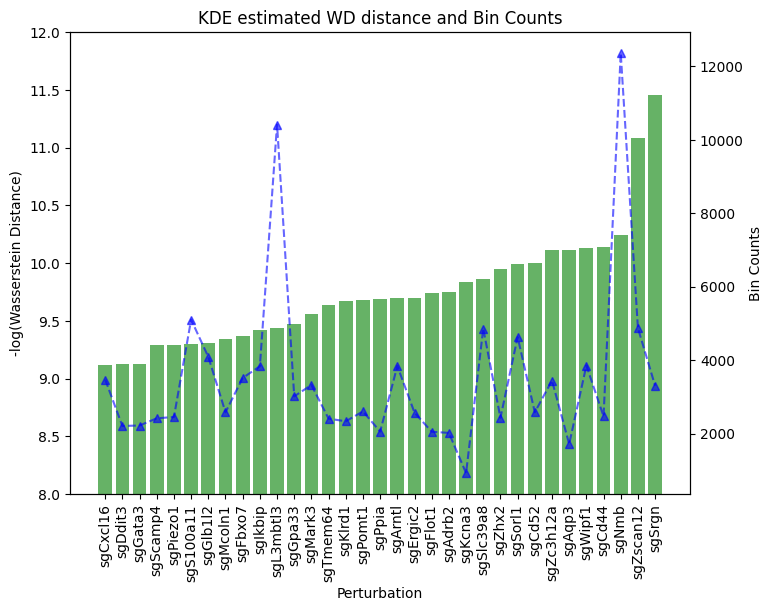

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
d_df = pd.DataFrame(r_dict, index=['wd']).T
d_df["-log(wd)"] = (-np.log10(d_df['wd'])).tolist()
d_df.sort_values(by='-log(wd)', inplace=True)

fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制第一个图表
ax1.bar(d_df.index, d_df['-log(wd)'], color='g', alpha=0.6)
ax1.set_xlabel("Perturbation")
ax1.set_ylabel("-log(Wasserstein Distance)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(cnt_df.loc[d_df.index].index, cnt_df.bins, color='b', marker='^', linestyle='dashed', alpha=0.6)
ax2.set_ylabel("Bin Counts", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 设置 x 轴刻度
ax1.set_xticks(ticks=range(len(cnt_df.index)))
ax1.set_xticklabels(labels=d_df.index, rotation=90)

ax1.set_ylim([8, 12])

# 设置标题
plt.title("KDE estimated WD distance and Bin Counts")

# 显示图表
plt.show()

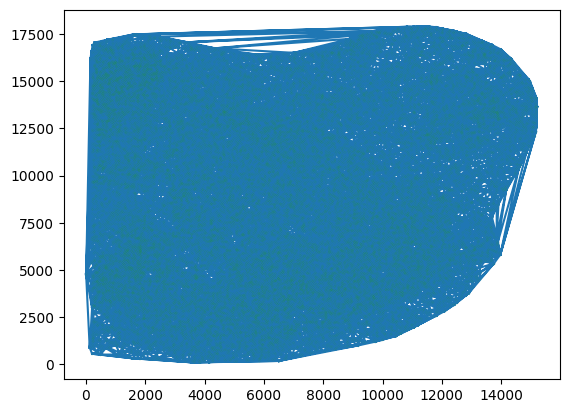

In [140]:
spatial_coords = filtered_data.obsm['spatial']

from scipy.spatial import Delaunay
tri = Delaunay(spatial_coords)

import matplotlib.pyplot as plt

plt.triplot(spatial_coords[:, 0], spatial_coords[:, 1], tri.simplices)
plt.plot(spatial_coords[:, 0], spatial_coords[:, 1], '.', markersize=0.1, color)
plt.show()

In [155]:
import squidpy as sq

In [157]:
sq.gr.spatial_neighbors(filtered_data, n_neighs=3, delaunay=True)

In [167]:
(filtered_data.obsp['spatial_distances'] > 0).sum(axis=1)

matrix([[ 5],
        [ 4],
        [ 6],
        ...,
        [ 6],
        [ 7],
        [20]])